ЛАБОРАТОРНАЯ РАБОТА №6. «ОБУЧЕНИЕ БЕЗ УЧИТЕЛЯ. ЗАДАЧА КЛАСТЕРИЗАЦИИ»

ЗАДАНИЕ №1 СДЕЛАНО
1. Сгенерировать 3 датасета (make_classification или make_blobs)
2. Провести визуализацию
3. Провести кластеризацию (все методы)
4. Для каждого метода подобрать оптимальные гиперпараметры.
5. Самостоятельно реализовать KMeans. Проверить его работу на датасетах.
6. Каждый метод оценивать 2 внешними и 2 внутренними метриками.

ЗАДАНИЕ №2. ДОДЕЛАТЬ
1. На основе датасета для задачи классификации построить модель кластеризации, используя три метода: k-means; иерархическая кластеризация; DBSCAN.
2. Произвести визуализацию построенных моделей.
3. Выполнить оценку качества полученных моделей кластеризации. Сравнить полученные результаты.


ЗАДАНИЕ №3*. ДОДЕЛАТЬ
Реализовать алгоритма DBSCAN и с его помощью провести кластеризацию всех датасетов Лаб_работы №6.

In [ ]:
from sklearn.datasets import make_classification
import numpy as np
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score, rand_score, make_scorer, calinski_harabasz_score
import pandas as pd
from pprint import pprint

# Функции:

In [ ]:
def elbow_method(data, num_clusters_range=10):
    '''
    "data" - Датасет
    "num_clusters_range" - количество итераций. По умолчанию 10

    '''
    scores = []

    for iteration in range(1, num_clusters_range + 1):
        model = KMeans(n_clusters=iteration, n_init='auto').fit(data)
        scores.append(model.inertia_)

    return scores


In [ ]:
def plot_schedule(data, model, title):
    '''
    "data" - Датасет
    "model" - Обученная модель кластеризации
    "title" - Название графика

    '''
    plt.scatter(data[:, 0], data[:, 1], c = model.labels_)
    plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=70, c='red')
    plt.title(title)
    plt.show()


In [ ]:
def get_metrics(data, y, model) -> dict:
    '''
    Получает метрики для оценки качества кластеризации.

    Параметры:
        - data: Данные для кластеризации.
        - y: Истинные метки кластеров.
        - model: Обученная модель кластеризации.

    Возвращает:
        Словарь с метриками, включая silhouette_score, rand_score, adjusted_rand_score, normalized_mutual_info_score.
    '''
    try:
      y_pred = model.labels_
    except:
      y_pred = model.predict(data)

    metrics = {
        'silhouette_score': round(silhouette_score(data, y_pred), 2),
        'calinski_harabasz_score': round(calinski_harabasz_score(data, y_pred),2),
        'rand_score' : round(rand_score(y_pred, y), 2),
        'adjusted_rand_score' : round(adjusted_rand_score(y, y_pred), 2),
    }

    return metrics

In [ ]:
def print_metrics(title, model1, model2, model3):
    dict_dataset_metrics = dict()
    for index, (X, y, model) in enumerate([(X_one, y_one, model1), (X_two, y_two, model2), (X_three, y_three, model3)]):
        metrics = get_metrics(X, y, model)
        dict_dataset_metrics['{} {}'.format(title,index+1)] = metrics
    pprint(dict_dataset_metrics)

In [ ]:
X_one, y_one = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
X_two, y_two = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=66)
X_three, y_three = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=99)

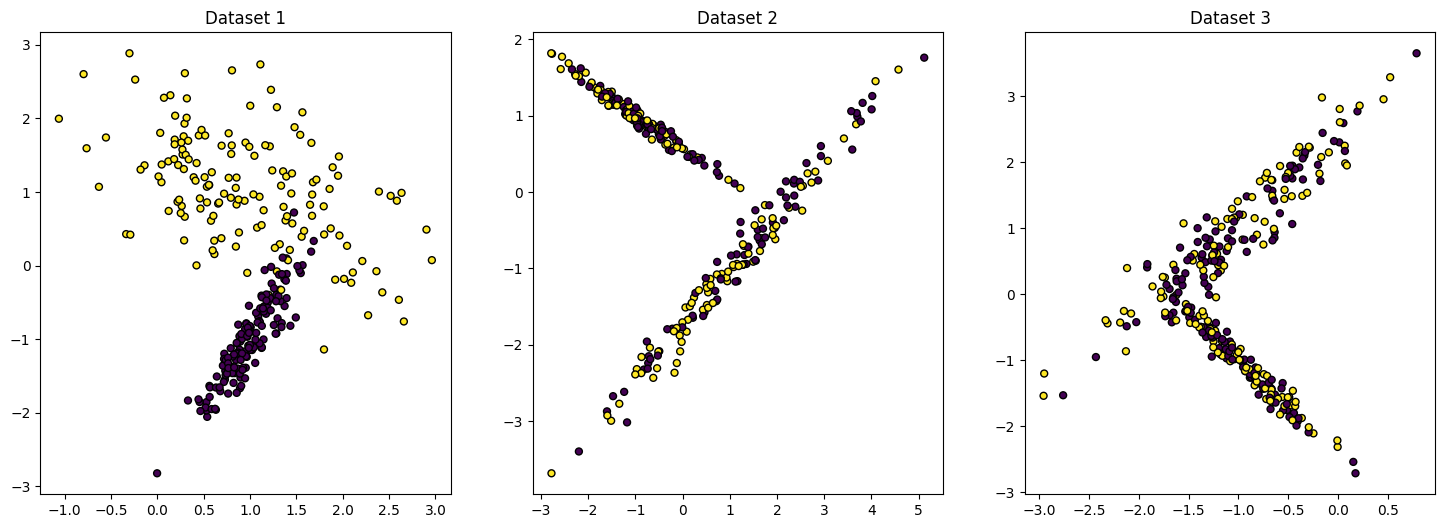

In [ ]:
plt.figure(figsize=(18, 6))
for index, files in enumerate([X_one, X_two, X_three]):
    plt.subplot(1, 3, index+1)
    plt.scatter(files[:, 0], files[:, 1], marker="o", c=y_one, s=25, edgecolor="k")
    plt.title(f"Dataset {index+1}")
plt.show()

#  Методы кластеризации

## KMeans - без подобра числа кластеров

In [ ]:
kmeans_dataset_one = KMeans(n_init='auto').fit(X_one)
kmeans_dataset_two = KMeans(n_init='auto').fit(X_two)
kmeans_dataset_three = KMeans(n_init='auto').fit(X_three)

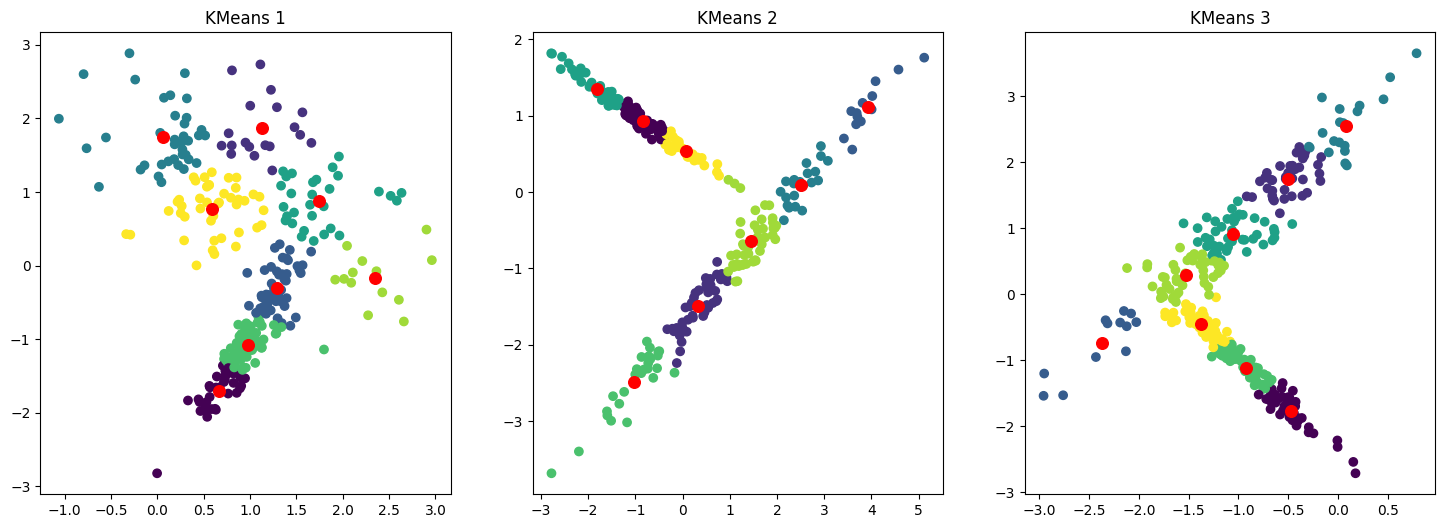

In [ ]:
plt.figure(figsize=(18, 6))
for index, files in enumerate([(X_one, kmeans_dataset_one), (X_two,kmeans_dataset_two), (X_three, kmeans_dataset_three)]):
    data = files[0]
    model = files[1]
    plt.subplot(1, 3, index+1)
    plt.scatter(data[:, 0], data[:, 1], c = model.labels_)
    plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=70, c='red')
    plt.title(f"KMeans {index+1}")
plt.show()

### Основные метрики

1. **Скорректированный индекс Рэнда (Adjusted Rand Score):** Измеряет схожесть между фактическими и предсказанными кластеризациями. Значения ближе к 1 указывают на лучшее соответствие.

2. **Балл Калински и Харабаша. (calinski_harabasz_score):** Это тоже внутренняя метрика, которая оценивает качество кластеризации, основываясь на отношении внутрикластерного разброса к межкластерному разбросу. Чем выше индекс, тем лучше кластеризация.

3. **Индекс Рэнда (Rand Score):** Показывает схожесть между фактическими и предсказанными кластеризациями, где 1 - идеальное соответствие. Учитывает истинно положительные и истинно отрицательные значения.

4. **Коэффициент силуэта (Silhouette Score):** Измеряет, насколько объект похож на свой собственный кластер по сравнению с другими кластерами. Имеет значения от -1 до 1, где более высокие значения указывают на лучшую дифференциацию кластеров.


### Продолжение

In [ ]:
print_metrics("KMeans", kmeans_dataset_one, kmeans_dataset_two, kmeans_dataset_three)

{'KMeans 1': {'adjusted_rand_score': 0.25,
              'calinski_harabasz_score': 434.16,
              'rand_score': 0.62,
              'silhouette_score': 0.41},
 'KMeans 2': {'adjusted_rand_score': 0.29,
              'calinski_harabasz_score': 826.98,
              'rand_score': 0.65,
              'silhouette_score': 0.52},
 'KMeans 3': {'adjusted_rand_score': 0.22,
              'calinski_harabasz_score': 742.58,
              'rand_score': 0.61,
              'silhouette_score': 0.44}}


## KMeans - с подбором числа кластеров

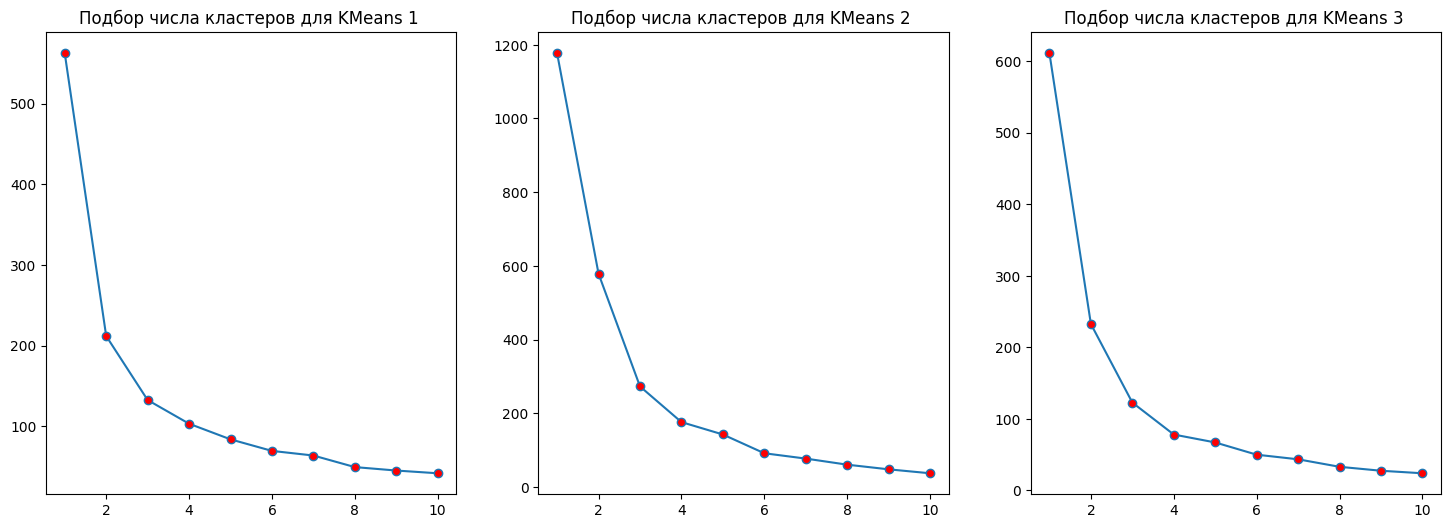

In [ ]:
iterations = 10
plt.figure(figsize=(18, 6))
for index, data in enumerate([X_one, X_two, X_three]):
    results_iter = elbow_method(data, iterations)
    plt.subplot(1, 3, index+1)
    plt.plot(range(1, iterations+1), results_iter, marker='o', markerfacecolor=[1, 0, 0, 1])
    plt.title("Подбор числа кластеров для KMeans {} ".format(index+1))
plt.show()

In [ ]:
kmeans_dataset_one = KMeans(n_clusters = 3, n_init='auto').fit(X_one)
kmeans_dataset_two = KMeans(n_clusters = 5, n_init='auto').fit(X_two)
kmeans_dataset_three = KMeans(n_clusters = 3, n_init='auto').fit(X_three)

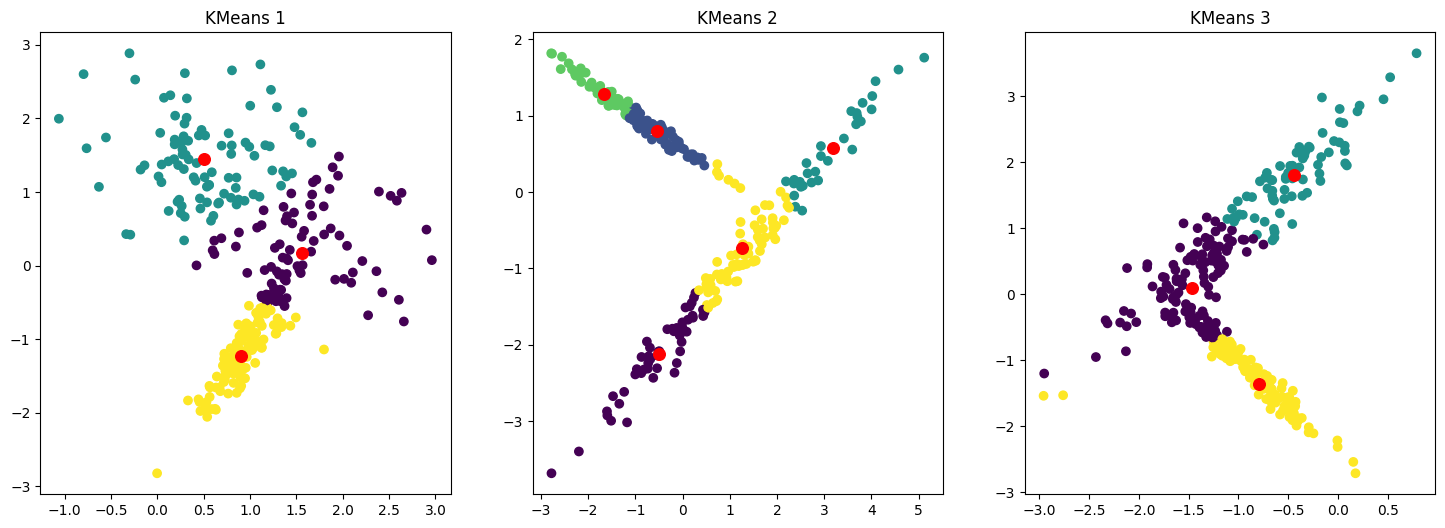

In [ ]:
plt.figure(figsize=(18, 6))
for index, (data, model) in enumerate([(X_one, kmeans_dataset_one), (X_two,kmeans_dataset_two), (X_three, kmeans_dataset_three)]):
    plt.subplot(1, 3, index+1)
    plt.scatter(data[:, 0], data[:, 1], c = model.labels_)
    plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=70, c='red')
    plt.title(f"KMeans {index+1}")
plt.show()

In [ ]:
print_metrics("KMeans", kmeans_dataset_one, kmeans_dataset_two, kmeans_dataset_three)

{'KMeans 1': {'adjusted_rand_score': 0.5,
              'calinski_harabasz_score': 483.91,
              'rand_score': 0.75,
              'silhouette_score': 0.48},
 'KMeans 2': {'adjusted_rand_score': 0.4,
              'calinski_harabasz_score': 609.36,
              'rand_score': 0.7,
              'silhouette_score': 0.51},
 'KMeans 3': {'adjusted_rand_score': 0.35,
              'calinski_harabasz_score': 590.0,
              'rand_score': 0.67,
              'silhouette_score': 0.52}}


## DBSCAN - без подбора гиперпараметров

In [ ]:
dbscan_one = DBSCAN().fit(X_one)
dbscan_two = DBSCAN().fit(X_two)
dbscan_three = DBSCAN().fit(X_three)

In [ ]:
print("Количество уникальных labels для Dataset_one {}".format(len(np.unique(dbscan_one.labels_))))
print("Количество уникальных labels для Dataset_two {}".format(len(np.unique(dbscan_two.labels_))))
print("Количество уникальных labels для Dataset_three {}".format(len(np.unique(dbscan_three.labels_))))

Количество уникальных labels для Dataset_one 2
Количество уникальных labels для Dataset_two 2
Количество уникальных labels для Dataset_three 2


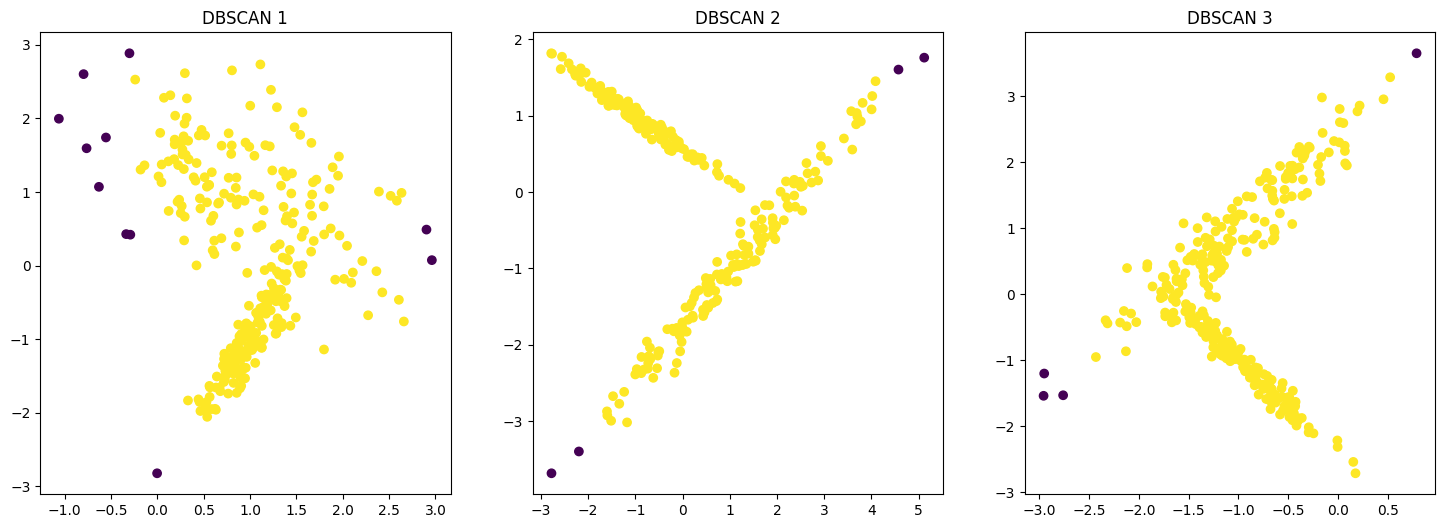

In [ ]:
plt.figure(figsize=(18, 6))
for index, (data, model) in enumerate([(X_one, dbscan_one), (X_two,dbscan_two), (X_three, dbscan_three)]):
    plt.subplot(1, 3, index+1)
    plt.scatter(data[:, 0], data[:, 1], c = model.labels_)
    plt.title(f"DBSCAN {index+1}")
plt.show()

In [ ]:
print_metrics("DBSCAN", dbscan_one, dbscan_two, dbscan_three)

{'DBSCAN 1': {'adjusted_rand_score': 0.0,
              'calinski_harabasz_score': 10.27,
              'rand_score': 0.5,
              'silhouette_score': 0.34},
 'DBSCAN 2': {'adjusted_rand_score': -0.0,
              'calinski_harabasz_score': 2.15,
              'rand_score': 0.5,
              'silhouette_score': 0.51},
 'DBSCAN 3': {'adjusted_rand_score': 0.0,
              'calinski_harabasz_score': 2.0,
              'rand_score': 0.5,
              'silhouette_score': 0.44}}


## DBSCAN - с подбором гиперпараметров

In [ ]:
eps_values = [0.1, 0.5, 1.0, 1.5]
min_samples_values = [3, 5, 10, 15]
best_params = dict()

for index, (X, y) in enumerate([(X_one, y_one), (X_two, y_two), (X_three, y_three)]):
    best_score = -1
    temporary_dict = dict()

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
            rand = rand_score(y, dbscan.labels_)

            if rand > best_score:
                best_score = rand
                temporary_dict = {"eps": eps, 'min_samples': min_samples, 'best_rand': rand}

    best_params[f'DBSCAN {index+1}'] = temporary_dict


In [ ]:
best_params

{'DBSCAN 1': {'eps': 0.1, 'min_samples': 5, 'best_rand': 0.7474470457079153},
 'DBSCAN 2': {'eps': 0.5, 'min_samples': 10, 'best_rand': 0.9467335562987736},
 'DBSCAN 3': {'eps': 0.1, 'min_samples': 3, 'best_rand': 0.7076254180602006}}

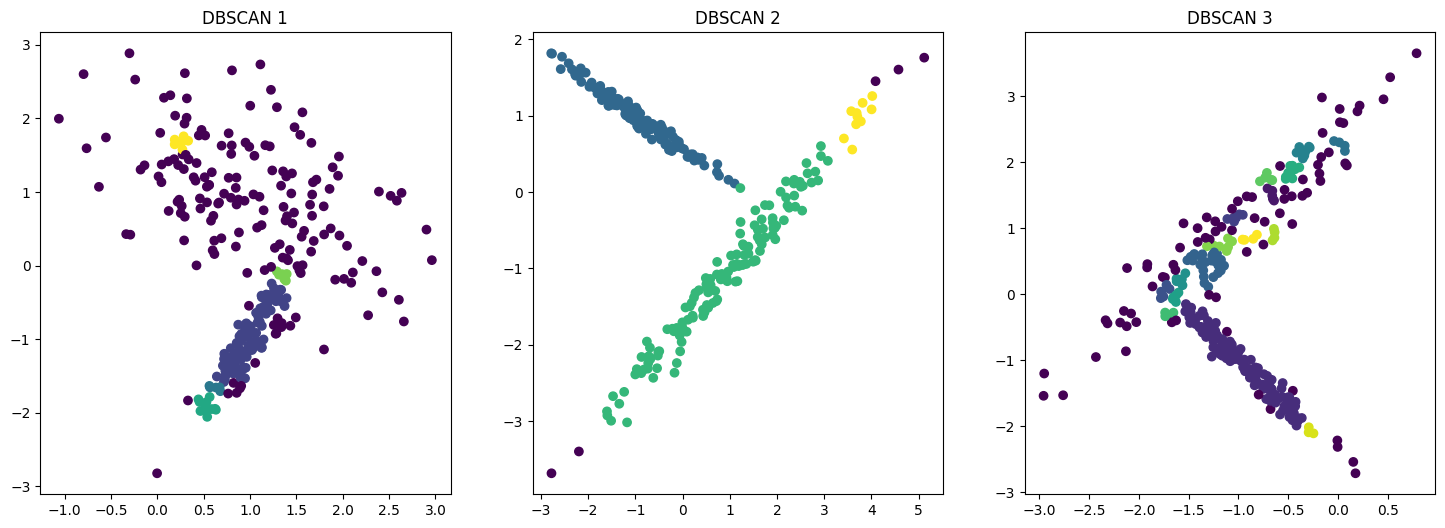

In [ ]:
dbscan_one = DBSCAN(eps=0.1, min_samples=5).fit(X_one)
dbscan_two = DBSCAN(eps=0.5, min_samples=10).fit(X_two)
dbscan_three = DBSCAN(eps=0.1, min_samples=3).fit(X_three)

plt.figure(figsize=(18, 6))

for index, (data, model) in enumerate([(X_one, dbscan_one), (X_two, dbscan_two), (X_three, dbscan_three)]):
    plt.subplot(1, 3, index + 1)
    plt.scatter(data[:, 0], data[:, 1], c=model.labels_)
    plt.title(f"DBSCAN {index+1}")

plt.show()

In [ ]:
print_metrics("DBSCAN", dbscan_one, dbscan_two, dbscan_three)

{'DBSCAN 1': {'adjusted_rand_score': 0.49,
              'calinski_harabasz_score': 56.07,
              'rand_score': 0.75,
              'silhouette_score': -0.19},
 'DBSCAN 2': {'adjusted_rand_score': 0.89,
              'calinski_harabasz_score': 147.81,
              'rand_score': 0.95,
              'silhouette_score': 0.51},
 'DBSCAN 3': {'adjusted_rand_score': 0.41,
              'calinski_harabasz_score': 23.45,
              'rand_score': 0.71,
              'silhouette_score': -0.06}}


## GaussianMixture - без подобра числа кластеров

In [ ]:
gm_one = GaussianMixture(n_components=2, random_state=17).fit(X_one)
gm_two = GaussianMixture(n_components=2, random_state=17).fit(X_two)
gm_three = GaussianMixture(n_components=2, random_state=17).fit(X_three)

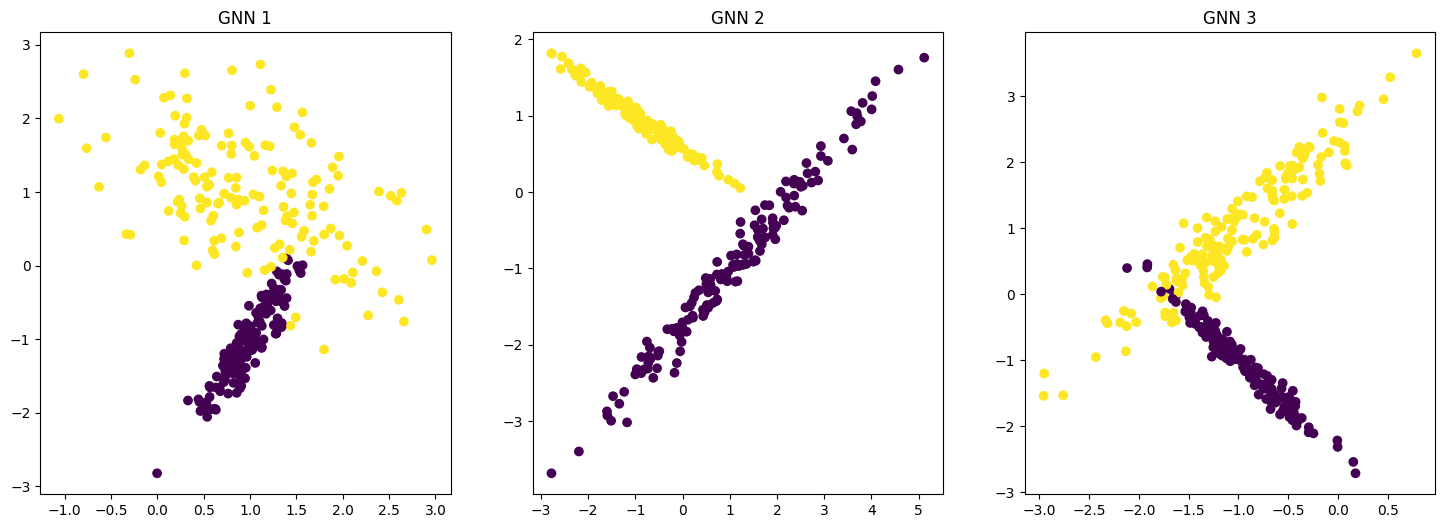

In [ ]:
plt.figure(figsize=(18, 6))
for index, (data, model) in enumerate([(X_one, gm_one), (X_two, gm_two), (X_three, gm_three)]):
    plt.subplot(1, 3, index+1)
    plt.scatter(data[:, 0], data[:, 1], c = model.predict(data))
    plt.title(f"GNN {index+1}")
plt.show()

In [ ]:
print_metrics("GaussianMixture", gm_one, gm_two, gm_three)

{'GaussianMixture 1': {'adjusted_rand_score': 0.83,
                       'calinski_harabasz_score': 388.09,
                       'rand_score': 0.92,
                       'silhouette_score': 0.5},
 'GaussianMixture 2': {'adjusted_rand_score': 0.97,
                       'calinski_harabasz_score': 289.71,
                       'rand_score': 0.99,
                       'silhouette_score': 0.54},
 'GaussianMixture 3': {'adjusted_rand_score': 0.91,
                       'calinski_harabasz_score': 317.99,
                       'rand_score': 0.95,
                       'silhouette_score': 0.47}}


## GaussianMixture - подбор числа кластеров

In [ ]:
n_iterations = 10
dict_aic = dict()
for index, data in enumerate([X_one, X_two, X_three]):
    scores = []
    best_aic = np.inf

    for iter in range(1, n_iterations+1):
        model = GaussianMixture(n_components=iter, random_state=17).fit(data)
        aic = model.aic(data)
        scores.append(aic)
        if aic < best_aic:
            best_aic = aic

    dict_aic[f'Model {index+1}'] = scores

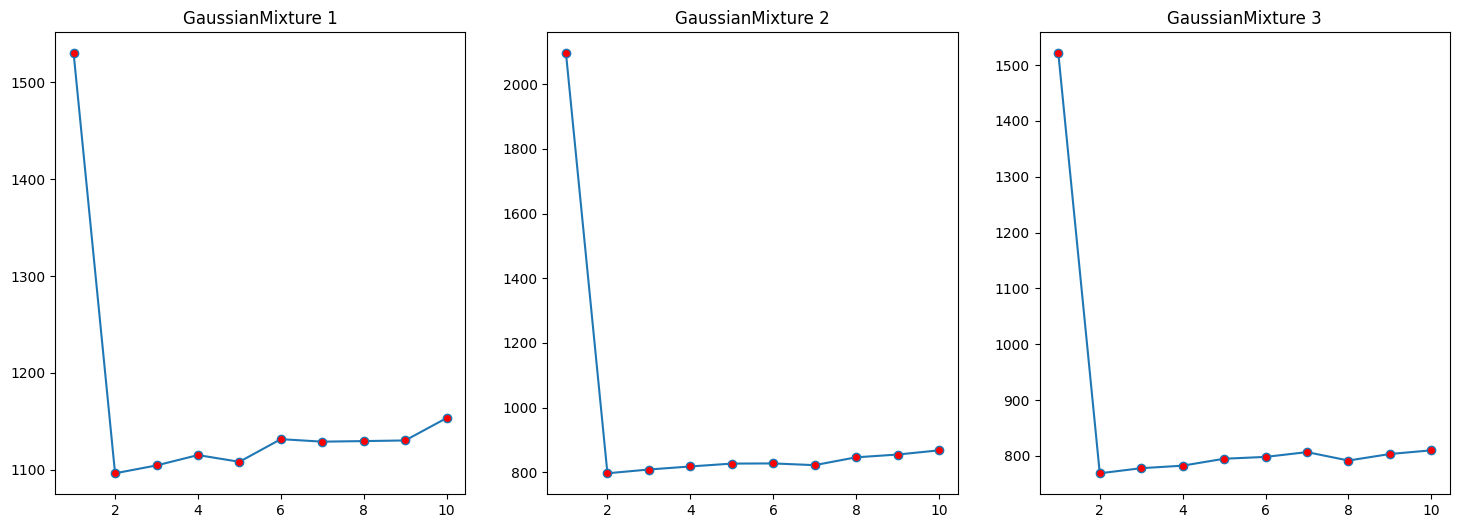

In [ ]:
iterations = 10
plt.figure(figsize=(18, 6))
for index, data in enumerate([dict_aic['Model 1'], dict_aic['Model 2'], dict_aic['Model 3']]):
    plt.subplot(1, 3, index+1)
    plt.plot(range(1, iterations+1), data, marker='o', markerfacecolor=[1, 0, 0, 1])
    plt.title("GaussianMixture {}".format(index+1))
plt.show()

Такой же результат как и без подбора

## AgglomerativeClustering - без подбора числа кластеров

In [ ]:
ac_model_one  = AgglomerativeClustering().fit(X_one)
ac_model_two  = AgglomerativeClustering().fit(X_two)
ac_model_three  = AgglomerativeClustering().fit(X_three)

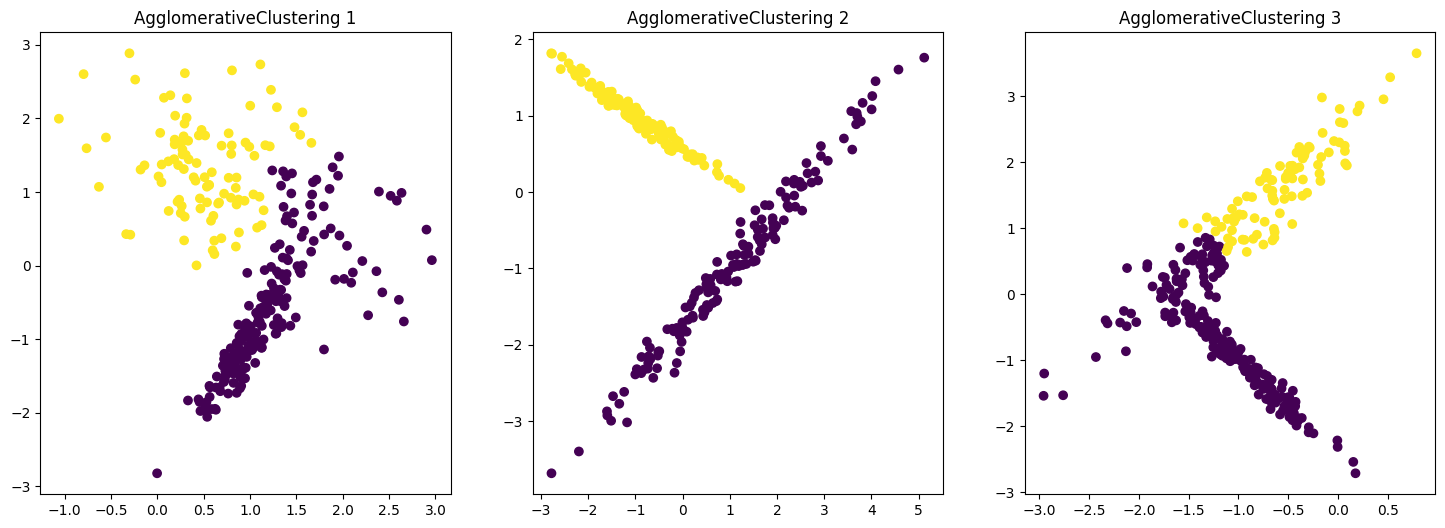

In [ ]:
plt.figure(figsize=(18, 6))
for index, (data, model) in enumerate([(X_one, ac_model_one), (X_two, ac_model_two), (X_three, ac_model_three)]):
    plt.subplot(1, 3, index+1)
    plt.scatter(data[:, 0], data[:, 1], c = model.labels_)
    plt.title(f"AgglomerativeClustering {index+1}")
plt.show()

In [ ]:
print_metrics("AgglomerativeClustering", ac_model_one, ac_model_two, ac_model_three)

{'AgglomerativeClustering 1': {'adjusted_rand_score': 0.43,
                               'calinski_harabasz_score': 328.38,
                               'rand_score': 0.71,
                               'silhouette_score': 0.48},
 'AgglomerativeClustering 2': {'adjusted_rand_score': 0.97,
                               'calinski_harabasz_score': 289.71,
                               'rand_score': 0.99,
                               'silhouette_score': 0.54},
 'AgglomerativeClustering 3': {'adjusted_rand_score': 0.35,
                               'calinski_harabasz_score': 437.03,
                               'rand_score': 0.67,
                               'silhouette_score': 0.53}}


## AgglomerativeClustering - подбор числа кластеров

In [ ]:
n_iterations = 10
dict_rand = dict()

for index, (data, y) in enumerate([(X_one, y_one), (X_two, y_two), (X_three, y_three)]):
    scores = []
    best_rand_score = -np.inf

    for n_clusters in range(2, n_iterations+1):
        model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward').fit(data)
        rand_score_value = rand_score(y, model.labels_)
        scores.append(rand_score_value)
        if rand_score_value > best_rand_score:
            best_n_clusters = n_clusters

    dict_rand[f'Model {index+1}'] = scores

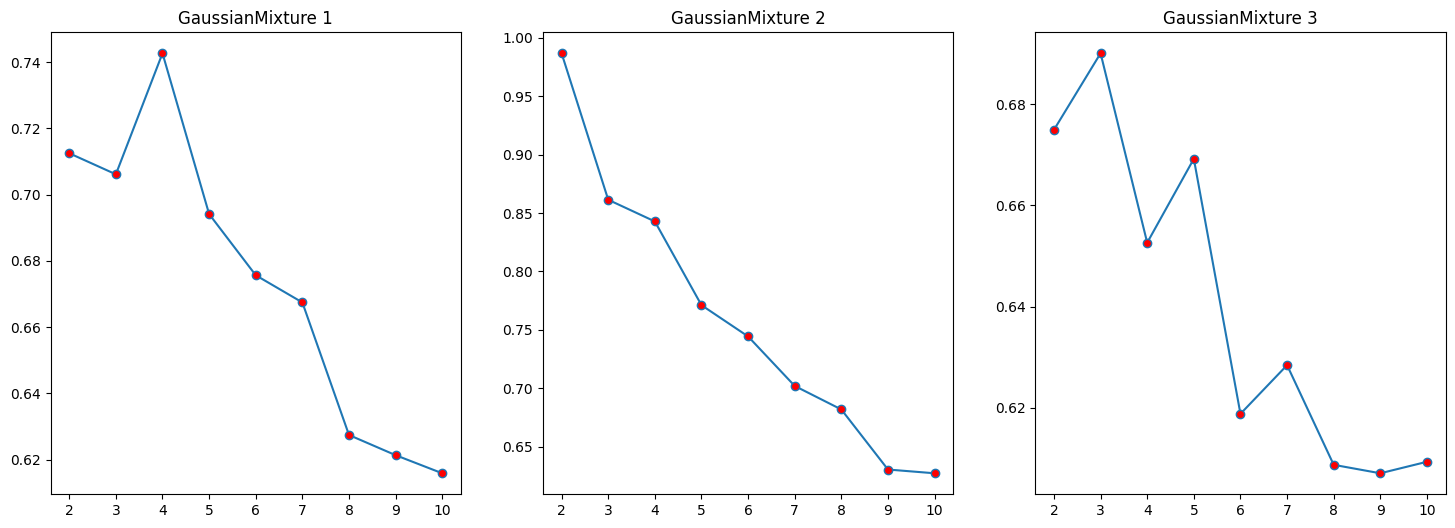

In [ ]:
iterations = 10
plt.figure(figsize=(18, 6))
for index, data in enumerate([dict_rand['Model 1'], dict_rand['Model 2'], dict_rand['Model 3']]):
    plt.subplot(1, 3, index+1)
    plt.plot(range(2, iterations+1), data, marker='o', markerfacecolor=[1, 0, 0, 1])
    plt.title("GaussianMixture {}".format(index+1))
plt.show()

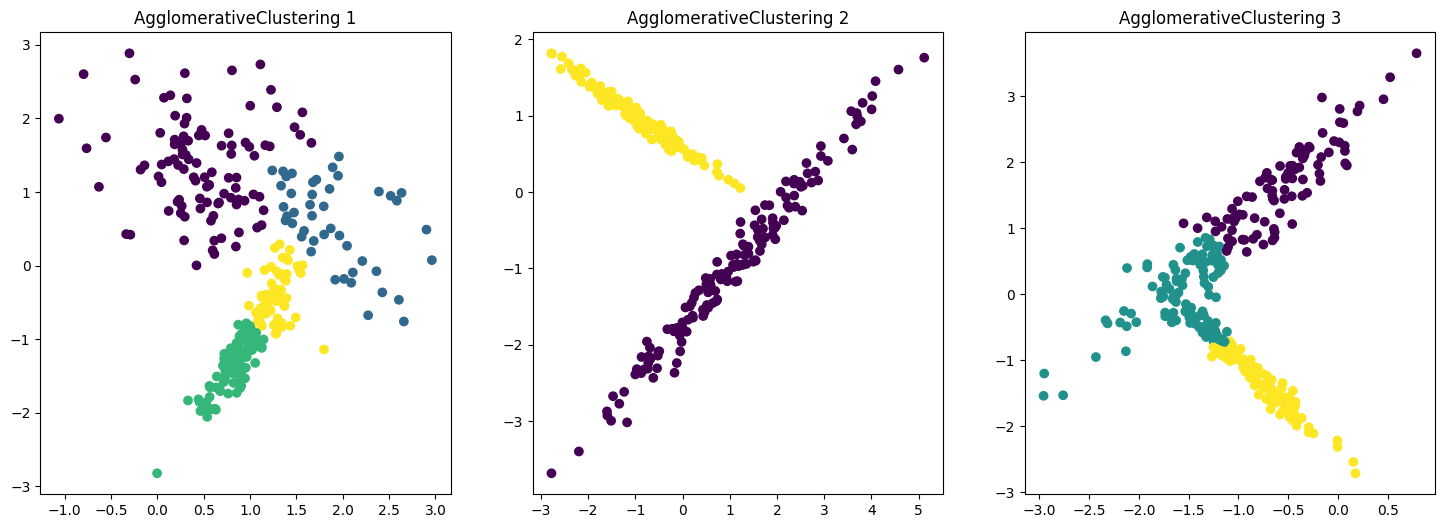

In [ ]:
ac_model_one  = AgglomerativeClustering(4).fit(X_one)
ac_model_two  = AgglomerativeClustering(2).fit(X_two)
ac_model_three  = AgglomerativeClustering(3).fit(X_three)

plt.figure(figsize=(18, 6))
for index, (data, model) in enumerate([(X_one, ac_model_one), (X_two, ac_model_two), (X_three, ac_model_three)]):
    plt.subplot(1, 3, index+1)
    plt.scatter(data[:, 0], data[:, 1], c = model.labels_)
    plt.title(f"AgglomerativeClustering {index+1}")
plt.show()

In [ ]:
print_metrics("AgglomerativeClustering", ac_model_one, ac_model_two, ac_model_three)

{'AgglomerativeClustering 1': {'adjusted_rand_score': 0.25,
                               'calinski_harabasz_score': 386.9,
                               'rand_score': 0.63,
                               'silhouette_score': 0.39},
 'AgglomerativeClustering 2': {'adjusted_rand_score': 0.26,
                               'calinski_harabasz_score': 779.12,
                               'rand_score': 0.63,
                               'silhouette_score': 0.47},
 'AgglomerativeClustering 3': {'adjusted_rand_score': 0.24,
                               'calinski_harabasz_score': 609.92,
                               'rand_score': 0.62,
                               'silhouette_score': 0.41}}


## Hierarchy иерархическая  кластеризация

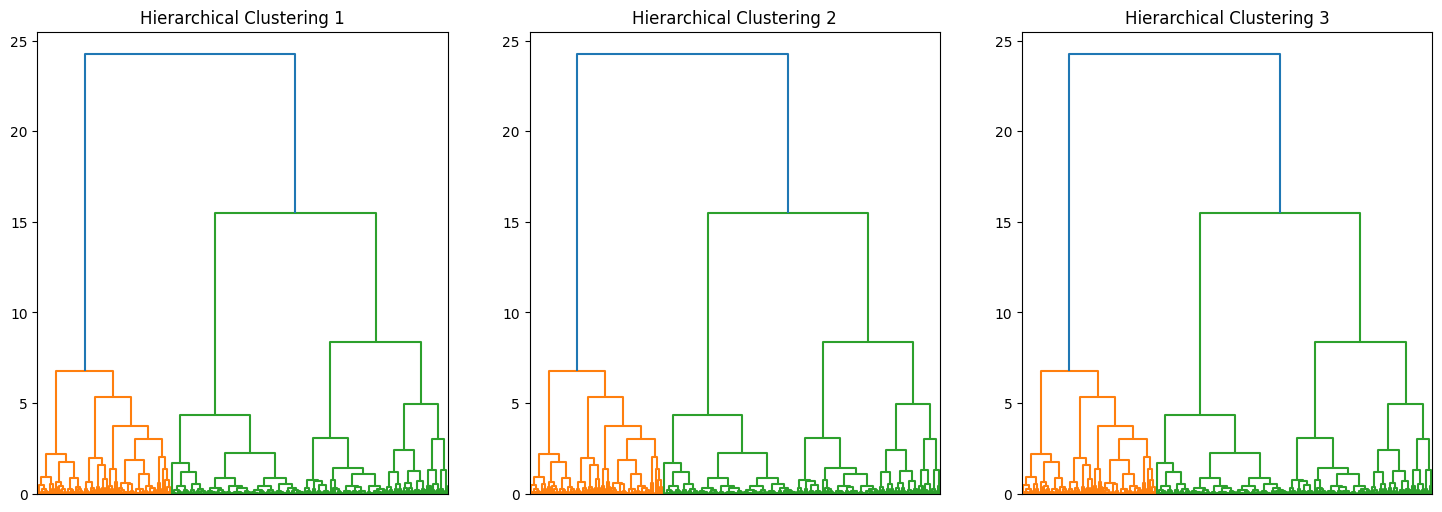

In [ ]:
linkage_one = linkage(X_one, method='ward')
linkage_two = linkage(X_two, method='ward')
linkage_three = linkage(X_three, method='ward')

plt.figure(figsize=(18, 6))

for index, data in enumerate([linkage_one, linkage_two, linkage_three]):
    plt.subplot(1, 3, index+1)
    dendrogram(linkage_one)
    plt.title("Hierarchical Clustering {}".format(index+1))
    plt.gca().set_xticks([])
plt.show()

## Карты Кохонена

In [ ]:
!pip install sklearn_som

In [ ]:
from sklearn_som.som import SOM

In [ ]:
X_one.shape

(300, 2)

## Без подбора

In [ ]:
som_one = SOM(m=2, n=1, dim=2)
som_one.fit(X_one)
som_two = SOM(m=2, n=1, dim=2)
som_two.fit(X_two)
som_three = SOM(m=2, n=1, dim=2)
som_three.fit(X_three)

In [ ]:
print_metrics("SOM", som_one, som_two, som_three)

{'SOM 1': {'adjusted_rand_score': 0.54,
           'calinski_harabasz_score': 458.7,
           'rand_score': 0.77,
           'silhouette_score': 0.46},
 'SOM 2': {'adjusted_rand_score': 0.92,
           'calinski_harabasz_score': 307.12,
           'rand_score': 0.96,
           'silhouette_score': 0.55},
 'SOM 3': {'adjusted_rand_score': 0.63,
           'calinski_harabasz_score': 484.85,
           'rand_score': 0.81,
           'silhouette_score': 0.54}}


## Подбор

In [ ]:
n_iterations = 10
dict_rand = dict()

for index, (data, y) in enumerate([(X_one, y_one), (X_two, y_two), (X_three, y_three)]):
    scores = []
    best_rand_score = -np.inf

    for iter in range(2, n_iterations+1):
        model = SOM(m = iter, n=1, dim=2)
        model.fit(data)
        rand_score_value = rand_score(y, model.predict(data))
        scores.append(rand_score_value)
        if rand_score_value > best_rand_score:
            best_n_clusters = n_clusters

    dict_rand[f'Model {index+1}'] = scores

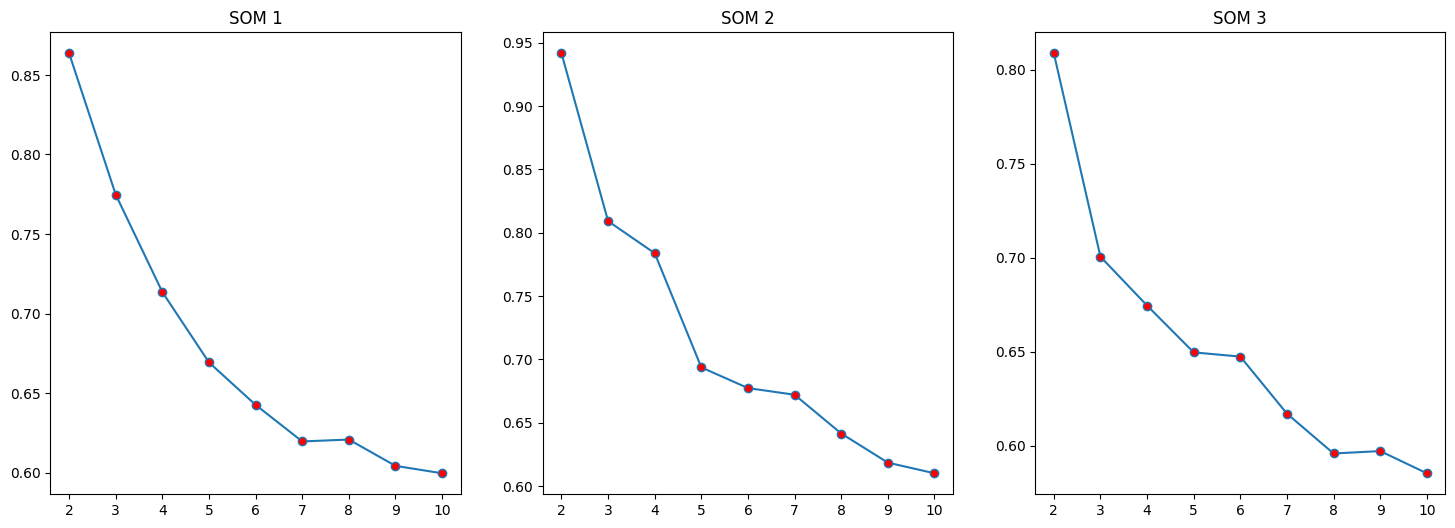

In [ ]:
plt.figure(figsize=(18, 6))
for index, data in enumerate([dict_rand['Model 1'], dict_rand['Model 2'], dict_rand['Model 3']]):
    plt.subplot(1, 3, index+1)
    plt.plot(range(2, 11), data, marker='o', markerfacecolor=[1, 0, 0, 1])
    plt.title("SOM {}".format(index+1))
plt.show()

Результат идентичен предыдущему

# Задание 2

In [ ]:
data = pd.read_csv("dataset.csv")

In [ ]:
data.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],Fire Alarm
0,17.557,53.23,1109.0,490.0,12849.0,19453,938.905,Yes
1,21.330,47.26,132.0,400.0,13216.0,20085,939.646,Yes
2,12.206,53.22,1153.0,408.0,12878.0,19437,938.757,Yes
3,26.510,49.45,1289.0,400.0,12960.0,19405,938.688,Yes
4,19.910,53.67,124.0,400.0,13220.0,20098,939.656,Yes


In [ ]:
X = data.drop('Fire Alarm', axis=1).values
y = data['Fire Alarm']

## KMeans

In [ ]:
kmeans = KMeans(n_init='auto').fit(X)

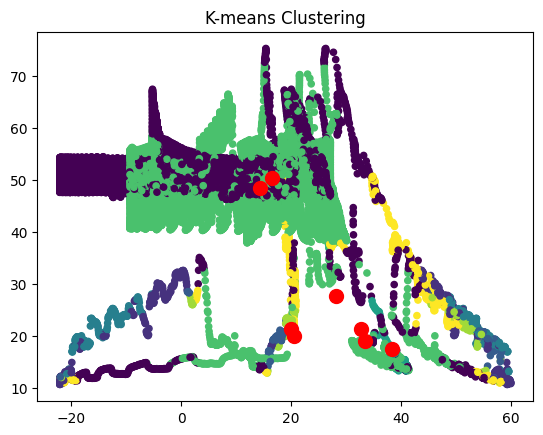

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=20)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='o', s=100)
plt.title('K-means Clustering')
plt.show()

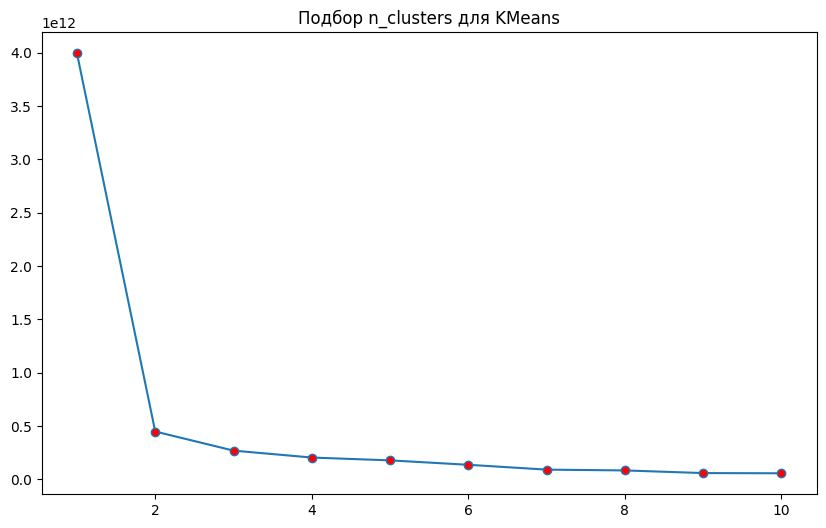

In [ ]:
plt.figure(figsize=(10, 6))
scores = elbow_method(X, 10)
plt.plot(range(1, 11), scores, marker='o', markerfacecolor=[1, 0, 0, 1])
plt.title("Подбор n_clusters для KMeans")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2, n_init='auto').fit(X)

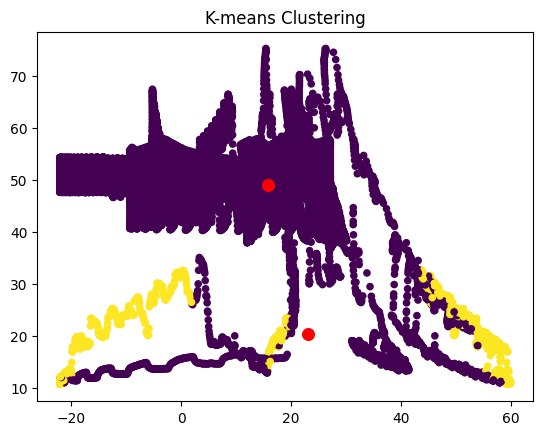

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=20)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='o', s=70)
plt.title('K-means Clustering')
plt.show()

In [ ]:
print(f'silhouette_score: {round(silhouette_score(X, kmeans.labels_), 2)}')
print(f'calinski_harabasz_score: {round(calinski_harabasz_score(X, kmeans.labels_), 2)}')
print(f'rand_score: {round(rand_score(kmeans.labels_, y), 2)}')
print(f'adjusted_rand_score: {round(adjusted_rand_score(y, kmeans.labels_), 2)}')

silhouette_score: 0.97
calinski_harabasz_score: 485077.7
rand_score: 0.61
adjusted_rand_score: 0.06


## DBSCAN

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_dbscan = scaler.fit_transform(X)

In [ ]:
dbscan = DBSCAN().fit(X_dbscan)

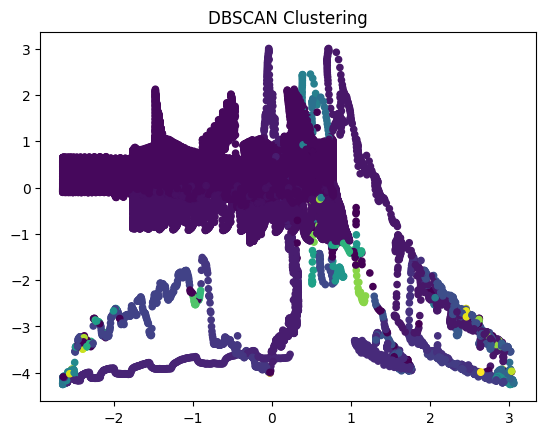

In [ ]:
plt.scatter(X_dbscan[:, 0], X_dbscan[:, 1], c=dbscan.labels_, cmap='viridis', s=20)
plt.title('DBSCAN Clustering')
plt.show()

In [ ]:
eps_values = [0.1, 0.3, 0.5, 1, 2, 3]
min_samples_values = [3, 4, 5, 6, 7]
best_score = -np.inf

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        rand = rand_score(y, dbscan.labels_)

        if rand > best_score:
            best_score = rand
            temporary_dict = {"eps": eps, 'min_samples': min_samples, 'best_rand': rand}

In [ ]:
temporary_dict

{'eps': 1, 'min_samples': 3, 'best_rand': 0.5917960282999649}

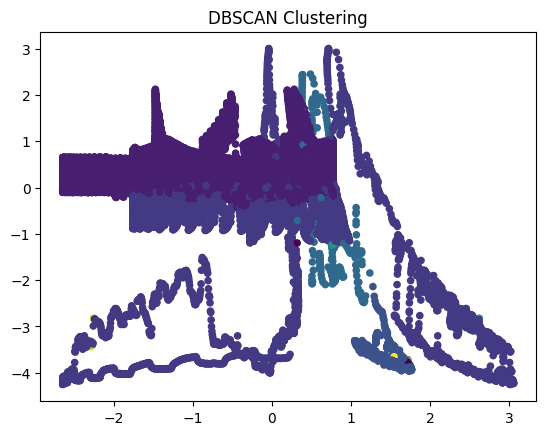

In [ ]:
dbscan = DBSCAN(eps=1, min_samples=3).fit(X_dbscan)
plt.scatter(X_dbscan[:, 0], X_dbscan[:, 1], c=dbscan.labels_, cmap='viridis', s=20)
plt.title('DBSCAN Clustering')
plt.show()

In [ ]:
print(f'silhouette_score: {round(silhouette_score(X_dbscan, dbscan.labels_), 2)}')
print(f'calinski_harabasz_score: {round(calinski_harabasz_score(X_dbscan, dbscan.labels_), 2)}')
print(f'rand_score: {round(rand_score(dbscan.labels_, y), 2)}')
print(f'adjusted_rand_score: {round(adjusted_rand_score(y, dbscan.labels_), 2)}')

silhouette_score: 0.49
calinski_harabasz_score: 2250.4
rand_score: 0.8
adjusted_rand_score: 0.56


## Иерархическая  кластеризация

In [ ]:
X_hierarchical = X[:10000, :]
y_hierarchical = y[:10000]

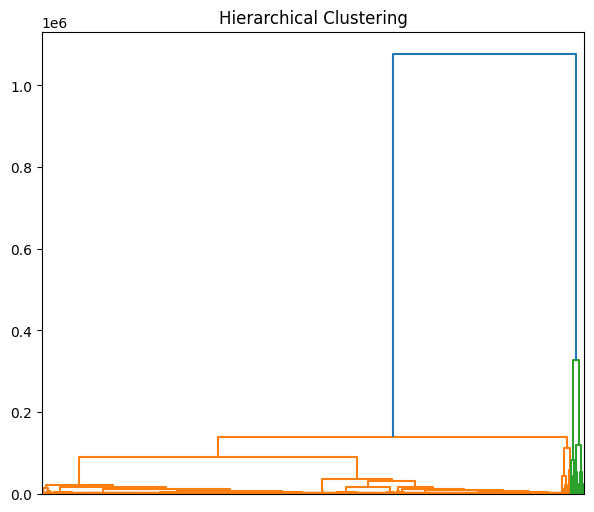

In [ ]:
linkage_one = linkage(X_hierarchical, method='ward')
plt.figure(figsize=(7, 6))
dendrogram(linkage_one)
plt.title("Hierarchical Clustering")
plt.gca().set_xticks([])
plt.show()

In [ ]:
num_clusters = 2
labels = fcluster(linkage_one, num_clusters, criterion='maxclust')
print(f'silhouette_score: {round(silhouette_score(X_hierarchical, labels), 2)}')
print(f'calinski_harabasz_score: {round(calinski_harabasz_score(X_hierarchical, labels), 2)}')
print(f'rand_score: {round(rand_score(y_hierarchical, labels), 2)}')
print(f'adjusted_rand_score: {round(adjusted_rand_score(y_hierarchical, labels), 2)}')

silhouette_score: 0.96
calinski_harabasz_score: 60949.31
rand_score: 0.61
adjusted_rand_score: 0.07


# Реализация KMeans

In [ ]:
class KMeans_:
    def __init__(self, n_clusters=2, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        self.centers = X[np.random.choice(len(X), self.n_clusters, replace=False)]

        for _ in range(self.max_iter):
            labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - self.centers, axis=2), axis=1)
            new_centers = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
            if np.all(self.centers == new_centers):
                break

            self.centers = new_centers

    def predict(self, X):
        return np.argmin(np.linalg.norm(X[:, np.newaxis] - self.centers, axis=2), axis=1)

In [ ]:
kmeans_o = KMeans_()
kmeans_t = KMeans_()
kmeans_th = KMeans_()

In [ ]:
kmeans_o.fit(X_one)
kmeans_t.fit(X_two)
kmeans_th.fit(X_three)

In [ ]:
print_metrics("My KMeans", kmeans_o, kmeans_t, kmeans_th)

{'My KMeans 1': {'adjusted_rand_score': 0.73,
                 'calinski_harabasz_score': 493.29,
                 'rand_score': 0.86,
                 'silhouette_score': 0.55},
 'My KMeans 2': {'adjusted_rand_score': 0.9,
                 'calinski_harabasz_score': 307.84,
                 'rand_score': 0.95,
                 'silhouette_score': 0.55},
 'My KMeans 3': {'adjusted_rand_score': 0.63,
                 'calinski_harabasz_score': 484.85,
                 'rand_score': 0.81,
                 'silhouette_score': 0.54}}


## Реализация DBSCAN